In [1]:
import pandas as pd
from statsmodels.formula.api import ols
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.font_manager as fm
# %matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
df1 = pd.read_csv('Data_TitleInfo.csv')
df2 = pd.read_csv('Data_StudentInfo.csv')
files = glob('Data_SubmitRecord/*.csv')
frame = []
for file in files:
    df = pd.read_csv(file)
    frame.append(df)
df3 = pd.concat(frame)
df3

,index,class,time,state,score,title_ID,method,memory,timeconsume,student_ID
0,0,Class1,1.704210e+09,Absolutely_Correct,3,Question_bumGRTJ0c8p4v5D6eHZa,Method_Cj9Ya2R7fZd6xs1q5mNQ,320,3,8b6d1125760bd3939b6e
1,1,Class1,1.704210e+09,Absolutely_Correct,3,Question_62XbhBvJ8NUSnApgDL94,Method_gj1NLb4Jn7URf9K2kQPd,356,3,8b6d1125760bd3939b6e
2,2,Class1,1.704210e+09,Absolutely_Correct,3,Question_ZTbD7mxr2OUp8Fz6iNjy,Method_5Q4KoXthUuYz3bvrTDFm,196,2,8b6d1125760bd3939b6e
3,3,Class1,1.704209e+09,Absolutely_Correct,3,Question_xqlJkmRaP0otZcX4fK3W,Method_m8vwGkEZc3TSW2xqYUoR,308,2,63eef37311aaac915a45
4,4,Class1,1.704208e+09,Absolutely_Correct,4,Question_FNg8X9v5zcbB1tQrxHR3,Method_Cj9Ya2R7fZd6xs1q5mNQ,320,3,5d89810b20079366fcc2
...,...,...,...,...,...,...,...,...,...,...
14176,14176,Class9,1.696431e+09,Absolutely_Correct,3,Question_4nHcauCQ0Y6Pm8DgKlLo,Method_gj1NLb4Jn7URf9K2kQPd,348,4,1hues7esy9erdsses6m0
14177,14177,Class9,1.697361e+09,Absolutely_Error,0,Question_QRm48lXxzdP7Tn1WgNOf,Method_m8vwGkEZc3TSW2xqYUoR,312,5,6qp85ufr2o1zg8k0cvtb
14178,14178,Class9,1.697353e+09,Error1,0,Question_Ou3f2Wt9BqExm5DpN7Zk,Method_m8vwGkEZc3TSW2xqYUoR,0,4,5rxl72n8rmnxwrxcss0q
14179,14179,Class9,1.701220e+09,Absolutely_Correct,3,Question_lU2wvHSZq7m43xiVroBc,Method_BXr9AIsPQhwNvyGdZL57,312,3,tbypawuj167ycyvg8sc2


In [3]:
# 去除空值
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()

In [4]:
# 去除重复值
df1 = df1.drop_duplicates(subset=['title_ID'])
df2 = df2.drop_duplicates()
df3 = df3.drop_duplicates()

In [5]:
# 不同的学习模式直接影响到学习者对知识的吸收、整合及应用能力，高效的学习模式能够促进知识的深度理解和长期记忆。
# 请对学习模式与知识掌握程度之间的潜在关系进行建模，利用图表的形式呈现结果并简要分析。

In [6]:
df3 = df3.loc[~(df3['class'] == 'class'),:]
df3 = df3.loc[~(df3['timeconsume'] == '--'),:]
df3 = df3.loc[~(df3['timeconsume'] == '-'),:]

In [7]:
# 每个班级的平均得分
df4 = df3.groupby(['class'])['score'].agg('mean').reset_index()

In [8]:
def f1(data):
    if data[-2] == 's':
        data = 'Class0' + data[-1]
    else:
        pass
    return data
df4['class'] = df4['class'].apply(f1)
df4 = df4.sort_values(by='class')

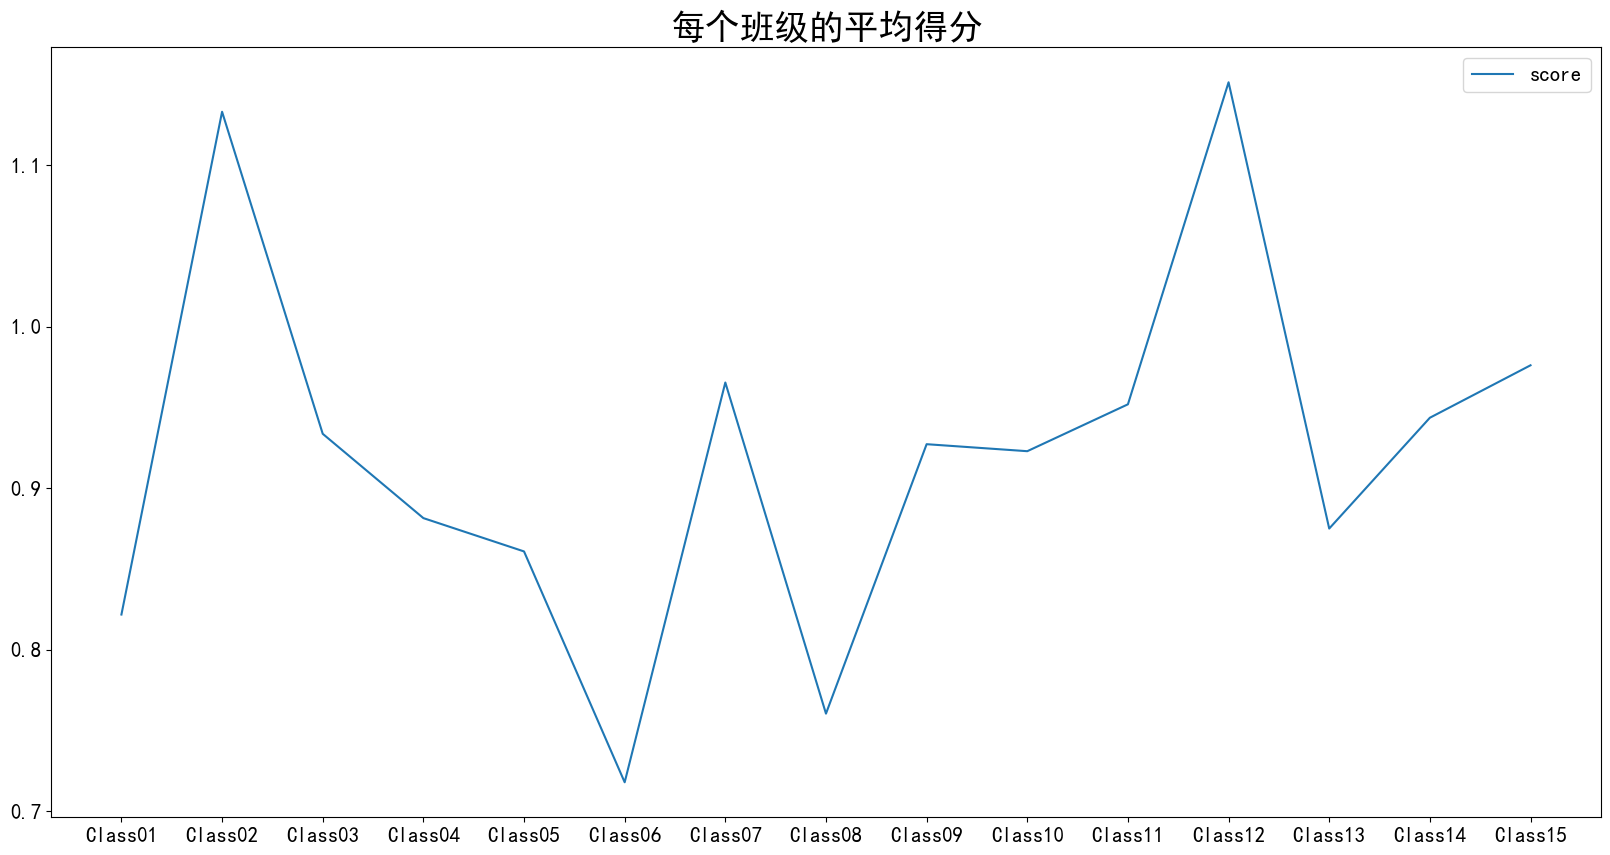

In [9]:
# 以下为数据可视化
fig=plt.figure(figsize=(20,10))
plt.plot(df4['class'],df4['score'],label='score')
# plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.title('每个班级的平均得分',fontsize=25)
plt.savefig('每个班级的平均得分.jpg',dpi=660,bbox_inches='tight')  #  保存图片
plt.show()

In [10]:
# 不同年龄得分
df3 = pd.merge(df3,df2,on = 'student_ID')
df3.head()

,index_x,class,time,state,score,title_ID,method,memory,timeconsume,student_ID,index_y,sex,age,major
0,0,Class1,1.704210e+09,Absolutely_Correct,3,Question_bumGRTJ0c8p4v5D6eHZa,Method_Cj9Ya2R7fZd6xs1q5mNQ,320,3,8b6d1125760bd3939b6e,1,female,24,J23517
1,1,Class1,1.704210e+09,Absolutely_Correct,3,Question_62XbhBvJ8NUSnApgDL94,Method_gj1NLb4Jn7URf9K2kQPd,356,3,8b6d1125760bd3939b6e,1,female,24,J23517
2,2,Class1,1.704210e+09,Absolutely_Correct,3,Question_ZTbD7mxr2OUp8Fz6iNjy,Method_5Q4KoXthUuYz3bvrTDFm,196,2,8b6d1125760bd3939b6e,1,female,24,J23517
3,17,Class1,1.704207e+09,Absolutely_Correct,4,Question_FNg8X9v5zcbB1tQrxHR3,Method_m8vwGkEZc3TSW2xqYUoR,328,3,8b6d1125760bd3939b6e,1,female,24,J23517
4,18,Class1,1.704207e+09,Error1,0,Question_FNg8X9v5zcbB1tQrxHR3,Method_Cj9Ya2R7fZd6xs1q5mNQ,0,3,8b6d1125760bd3939b6e,1,female,24,J23517


In [11]:
df5 = df3.groupby(['age'])['score'].agg('mean').reset_index()
df5.head()

,age,score
0,18,0.903902
1,19,0.939268
2,20,0.962183
3,21,0.882651
4,22,0.864604


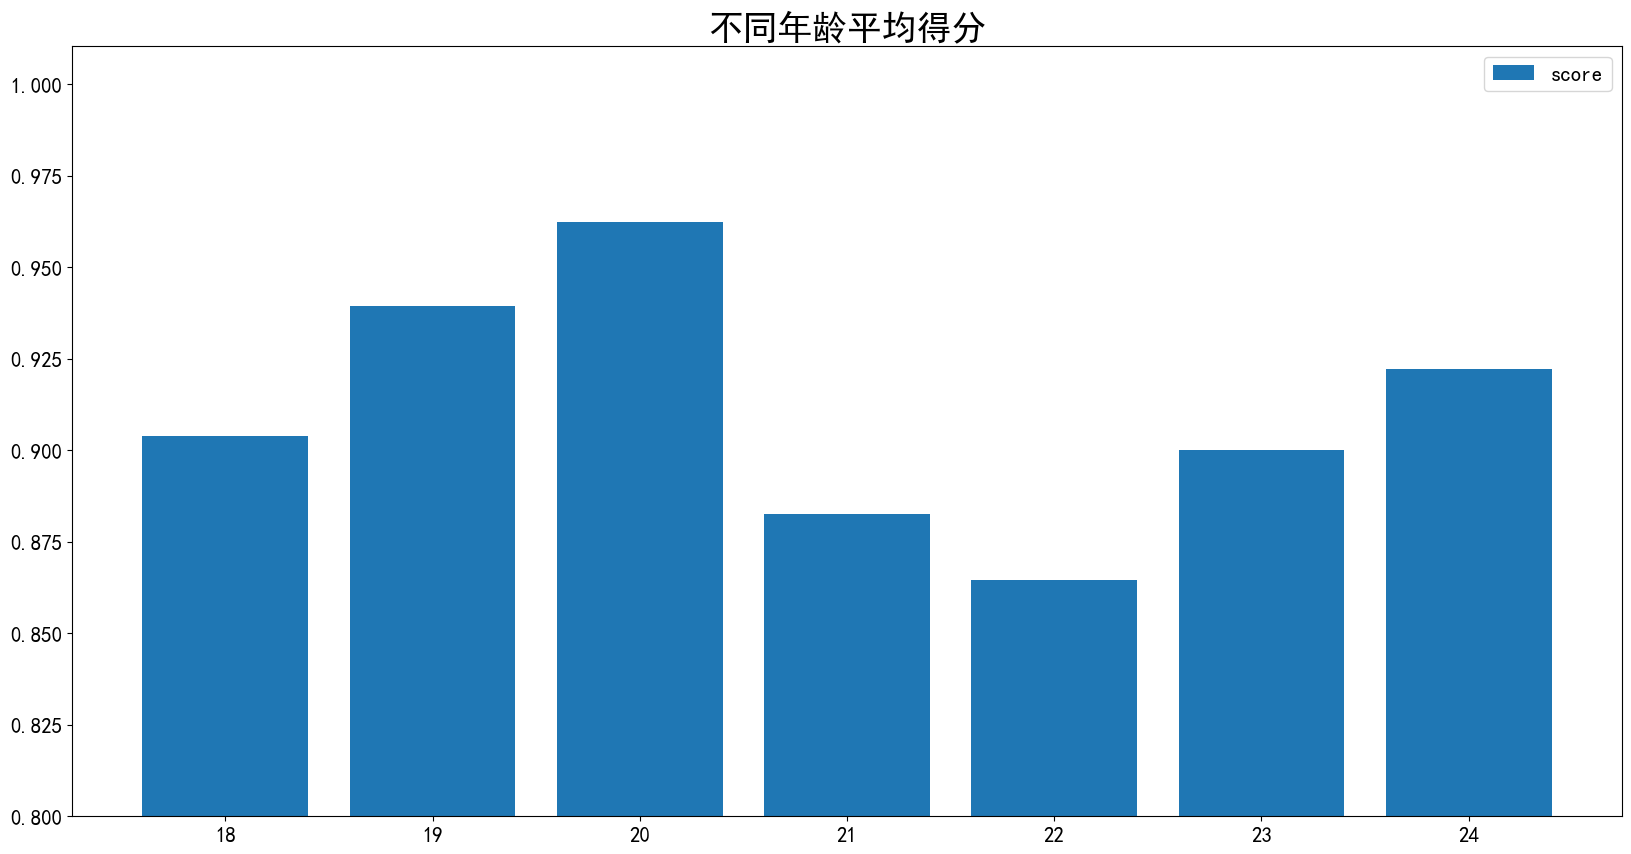

In [12]:
# 以下为数据可视化
fig=plt.figure(figsize=(20,10))
plt.bar(df5['age'],df5['score'],label='score')
# plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0.8,)
plt.legend(fontsize=15)
plt.title('不同年龄平均得分',fontsize=25)
plt.savefig('不同年龄平均得分.jpg',dpi=660,bbox_inches='tight')  #  保存图片
plt.show()

In [13]:
# 不同性别得分
df6 = df3.groupby(['sex'])['score'].agg('mean').reset_index()
df6.head()

,sex,score
0,female,0.930002
1,male,0.889741


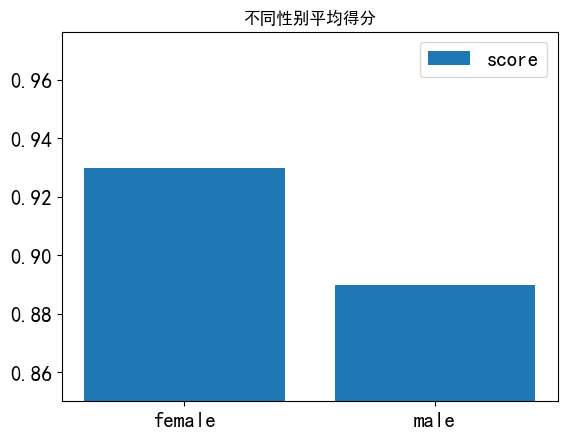

In [14]:
plt.bar(df6['sex'],df6['score'],label='score')
# plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0.85,)
plt.legend(fontsize=15)
plt.title('不同性别平均得分')
plt.savefig('不同性别平均得分.jpg',dpi=660,bbox_inches='tight')  #  保存图片
plt.show()

In [15]:
df3['timeconsume'] = df3['timeconsume'].astype(int)

In [16]:
# 学习模式与最后的平均得分直接的关系
df7 = df3.groupby(['student_ID'])['index_x'].count().reset_index()
b = df3.groupby(['student_ID'])['score','timeconsume'].agg('mean').reset_index()
c = df3.groupby(['student_ID'])['timeconsume'].agg('sum').reset_index()
c.head()

c:\users\14542\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,student_ID,timeconsume
0,0088dc183f73c83f763e,802
1,00cbf05221bb479e66c3,2583
2,00df647ee4bf7173642f,9814
3,0107f72b66cbd1a0926d,415
4,011d454f199c123d44ad,665


In [17]:
df7['score_mean'] = b['score']
df7['timeconsume_mean'] = b['timeconsume']
df7['timeconsume_sum'] = c['timeconsume']
df7.head()

,student_ID,index_x,score_mean,timeconsume_mean,timeconsume_sum
0,0088dc183f73c83f763e,213,0.784038,3.765258,802
1,00cbf05221bb479e66c3,240,0.595833,10.762500,2583
2,00df647ee4bf7173642f,468,0.596154,20.970085,9814
3,0107f72b66cbd1a0926d,118,1.237288,3.516949,415
4,011d454f199c123d44ad,192,0.640625,3.463542,665


In [18]:
df7 = pd.merge(df7,df2,on='student_ID')
df7.head()

,student_ID,index_x,score_mean,timeconsume_mean,timeconsume_sum,index,sex,age,major
0,0088dc183f73c83f763e,213,0.784038,3.765258,802,104,female,20,J40192
1,00cbf05221bb479e66c3,240,0.595833,10.762500,2583,844,female,19,J23517
2,00df647ee4bf7173642f,468,0.596154,20.970085,9814,1219,male,23,J57489
3,0107f72b66cbd1a0926d,118,1.237288,3.516949,415,394,female,20,J87654
4,011d454f199c123d44ad,192,0.640625,3.463542,665,224,male,22,J78901


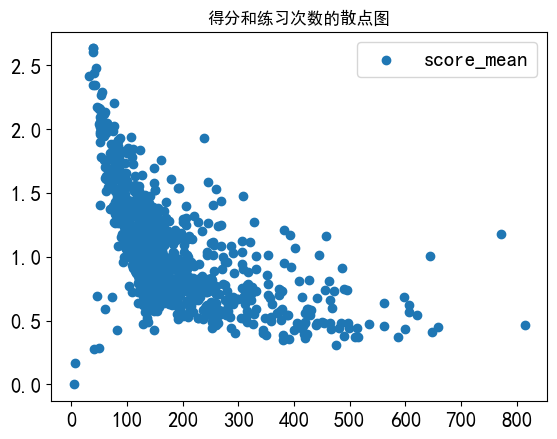

In [19]:
# 得分和练习次数的关系
plt.scatter(df7['index_x'],df7['score_mean'],label='score_mean')
# plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylim(0.85,)
plt.legend(fontsize=15)
plt.title('得分和练习次数的散点图')
plt.savefig('得分和练习次数的散点图.jpg',dpi=660,bbox_inches='tight')  #  保存图片
plt.show()

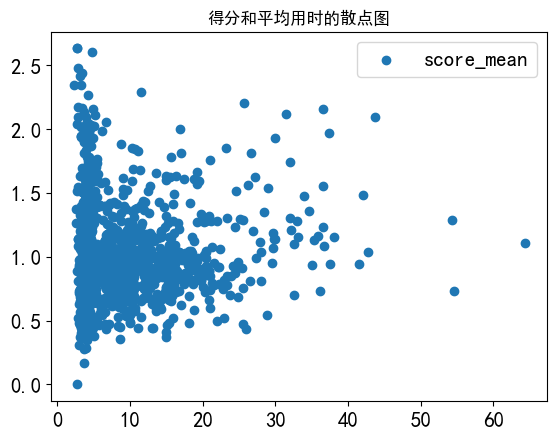

In [20]:
# 得分和平均用时的关系
plt.scatter(df7['timeconsume_mean'],df7['score_mean'],label='score_mean')
# plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylim(0.85,)
plt.legend(fontsize=15)
plt.title('得分和平均用时的散点图')
plt.savefig('得分和平均用时的散点图.jpg',dpi=660,bbox_inches='tight')  #  保存图片
plt.show()

In [21]:
df7.columns

Index(['student_ID', 'index_x', 'score_mean', 'timeconsume_mean',
       'timeconsume_sum', 'index', 'sex', 'age', 'major'],
      dtype='object')

In [22]:
# 进行多元性线性回归：电影评分的影响因素
lm = ols('score_mean ~ index_x + timeconsume_mean + timeconsume_sum + age', data=df7).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             score_mean   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.69e-98
Time:                        18:26:34   Log-Likelihood:                -296.71
No. Observations:                1364   AIC:                             603.4
Df Residuals:                    1359   BIC:                             629.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4026      0.090     15.527      0.000       1.225       1.580
index_x             -0.0023      0.000    -16.500      0.000      -0.003      -0.002
timeconsume_mean    -0.0001      0.002     -0.045      0.964      -0.005       0.005
timeconsume_sum   2.455e-05   1.13e-05      2.164      0.031    2.29e-06    4.68e-05
age                 -0.0021      0.004     -0.519      0.604      -0.010       0.006
==============================================================================
Omnibus:                      267.993   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              638.508
Skew:                           1.068   Prob(JB):                    2.24e-139
Kurtosis:                       5.583   Cond. No.                     2.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# 合理的题目难度应当与学习者的知识掌握程度相匹配，当学习者知识掌握水平很高但答题正确率较低时，意味着题目难度超出了其能力范围。
# 请试着利用可视分析方法找出这些不合理的题目。
df1.head()

,index,title_ID,score,knowledge,sub_knowledge
0,1,Question_VgKw8PjY1FR6cm2QI9XW,1,r8S3g,r8S3g_l0p5viby
1,2,Question_q7OpB2zCMmW9wS8uNt3H,1,r8S3g,r8S3g_n0m9rsw4
3,4,Question_fZrP3FJ4ebUogW9V7taS,1,r8S3g,r8S3g_n0m9rsw4
4,5,Question_BW0ItEaymH3TkD6S15JF,1,r8S3g,r8S3g_n0m9rsw4
5,6,Question_rvB9mVE6Kbd8jAY4NwPx,1,r8S3g,r8S3g_n0m9rsw4


In [24]:
# 题目的分数分布
df8 = df1.groupby(['score'])['index'].count().reset_index()
df8

,score,index
0,1,5
1,2,5
2,3,27
3,4,1


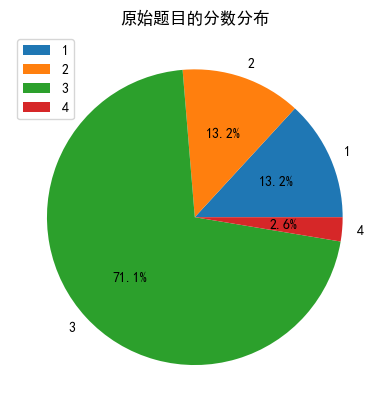

In [25]:
# 绘制饼图
plt.pie(df8['index'], labels=df8['score'],autopct='%1.1f%%')
 
# 添加标题
plt.title('原始题目的分数分布')
plt.legend()
plt.savefig('原始的分数分布.jpg',dpi=660,bbox_inches='tight')  #  保存图片

# 显示图表
plt.show()

In [26]:
# 作答题目的分数分布
df3 = pd.merge(df3,df1,on='title_ID')
df3.head()

,index_x,class,time,state,score_x,title_ID,method,memory,timeconsume,student_ID,index_y,sex,age,major,index,score_y,knowledge,sub_knowledge
0,0,Class1,1.704210e+09,Absolutely_Correct,3,Question_bumGRTJ0c8p4v5D6eHZa,Method_Cj9Ya2R7fZd6xs1q5mNQ,320,3,8b6d1125760bd3939b6e,1,female,24,J23517,42,3,b3C9s,b3C9s_l4z6od7y
1,21,Class1,1.704207e+09,Absolutely_Error,0,Question_bumGRTJ0c8p4v5D6eHZa,Method_gj1NLb4Jn7URf9K2kQPd,316,2,8b6d1125760bd3939b6e,1,female,24,J23517,42,3,b3C9s,b3C9s_l4z6od7y
2,22,Class1,1.704207e+09,Absolutely_Error,0,Question_bumGRTJ0c8p4v5D6eHZa,Method_m8vwGkEZc3TSW2xqYUoR,320,2,8b6d1125760bd3939b6e,1,female,24,J23517,42,3,b3C9s,b3C9s_l4z6od7y
3,10677,Class1,1.703997e+09,Absolutely_Correct,3,Question_bumGRTJ0c8p4v5D6eHZa,Method_Cj9Ya2R7fZd6xs1q5mNQ,324,3,63eef37311aaac915a45,2,female,21,J87654,42,3,b3C9s,b3C9s_l4z6od7y
4,14003,Class1,1.703573e+09,Absolutely_Correct,3,Question_bumGRTJ0c8p4v5D6eHZa,Method_Cj9Ya2R7fZd6xs1q5mNQ,312,3,5d89810b20079366fcc2,3,female,23,J87654,42,3,b3C9s,b3C9s_l4z6od7y


In [27]:
df9 = df3.groupby(['score_x'])['class'].count().reset_index()
df9

,score_x,class
0,0,132023
1,1,31370
2,2,24112
3,3,41048
4,4,1647


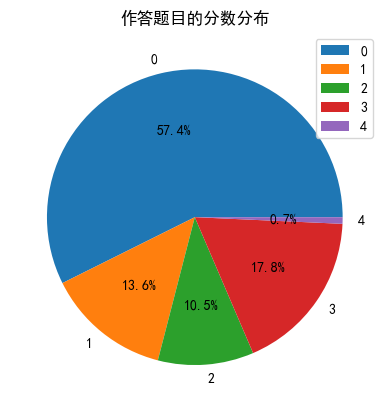

In [28]:
# 绘制饼图
plt.pie(df9['class'], labels=df9['score_x'],autopct='%1.1f%%')
 
# 添加标题
plt.title('作答题目的分数分布')
plt.legend()
plt.savefig('作答题目的分数分布.jpg',dpi=660,bbox_inches='tight')  #  保存图片

# 显示图表
plt.show()

In [29]:
# 每个题目的答题数量，前十
df10 = df3.groupby(['title_ID'])['class'].count().reset_index()
df10.head()

,title_ID,class
0,Question_3MwAFlmNO8EKrpY5zjUd,12037
1,Question_3oPyUzDmQtcMfLpGZ0jW,9946
2,Question_4nHcauCQ0Y6Pm8DgKlLo,6065
3,Question_5fgqjSBwTPG7KUV3it6O,11660
4,Question_62XbhBvJ8NUSnApgDL94,5310


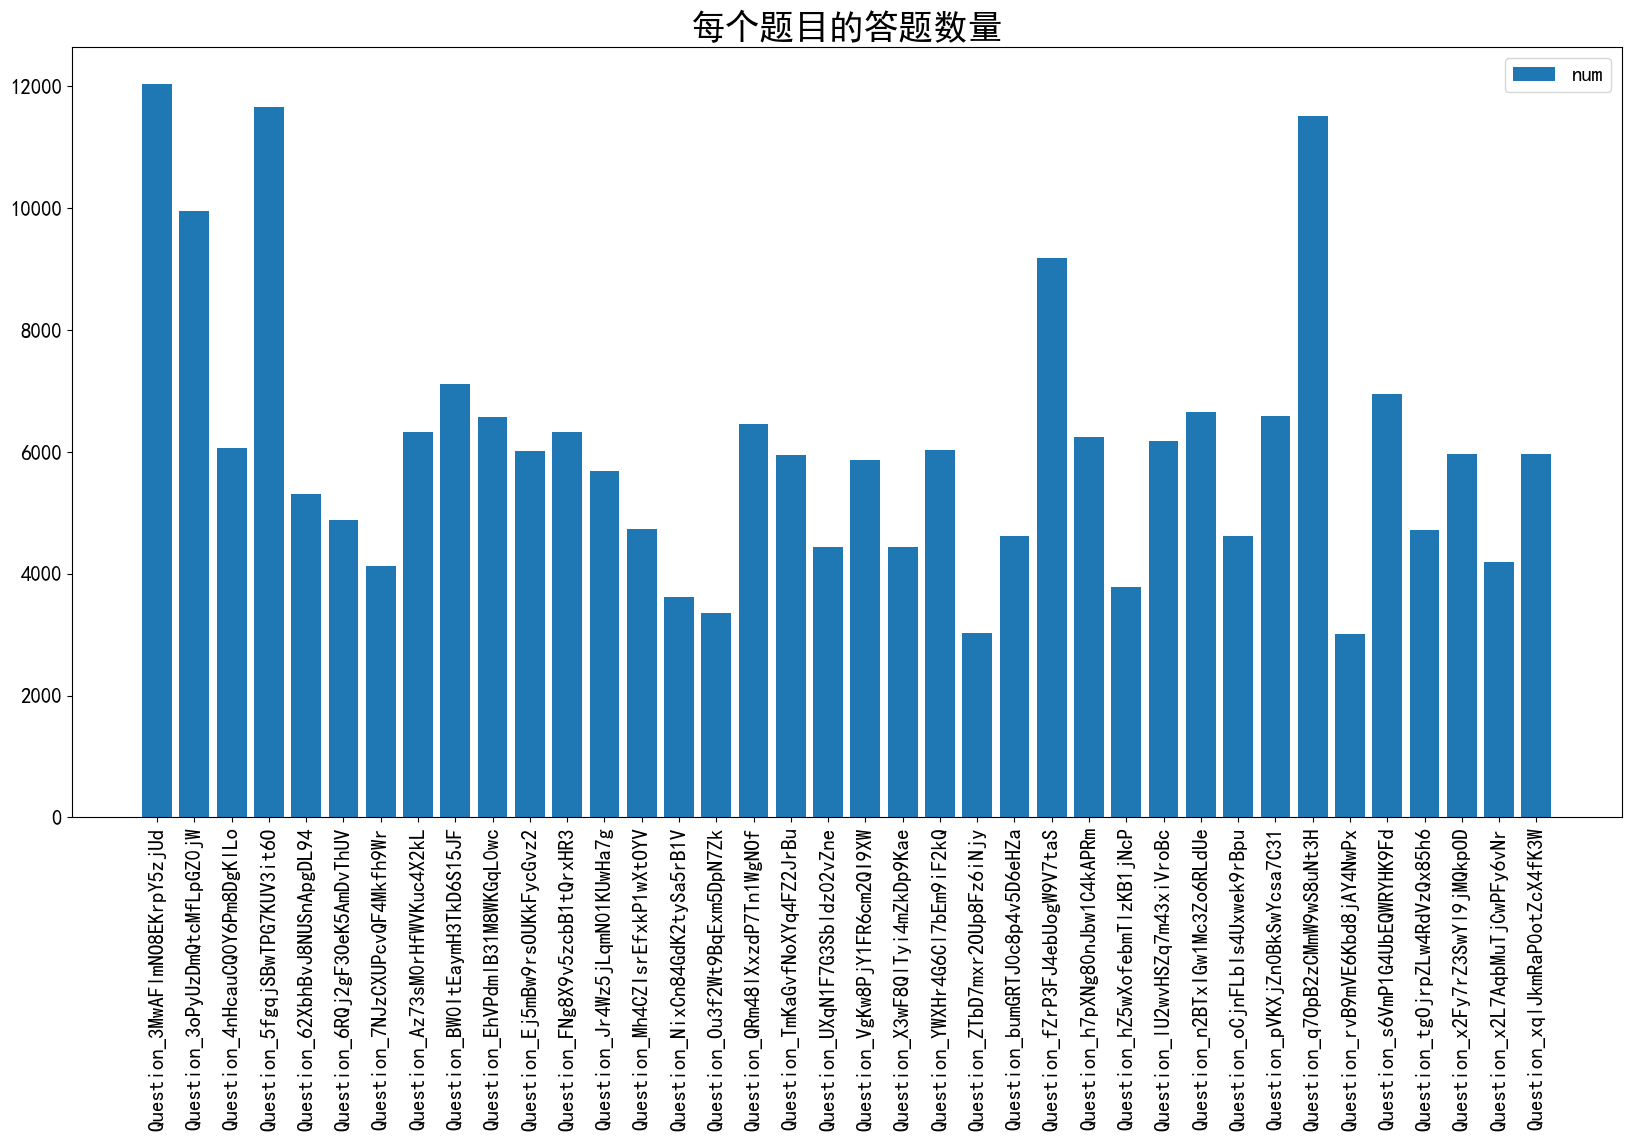

In [30]:
# 以下为数据可视化
fig=plt.figure(figsize=(20,10))
plt.bar(df10['title_ID'],df10['class'],label='num')
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.title('每个题目的答题数量',fontsize=25)
plt.savefig('每个题目的答题数量.jpg',dpi=660,bbox_inches='tight')  #  保存图片
plt.show()

In [31]:
# 每个题目的平均得分
df11 = df3.groupby(['title_ID'])['score_x'].agg('mean').reset_index()
df11.head()

,title_ID,score_x
0,Question_3MwAFlmNO8EKrpY5zjUd,0.747030
1,Question_3oPyUzDmQtcMfLpGZ0jW,0.414337
2,Question_4nHcauCQ0Y6Pm8DgKlLo,1.204782
3,Question_5fgqjSBwTPG7KUV3it6O,1.318182
4,Question_62XbhBvJ8NUSnApgDL94,1.145009


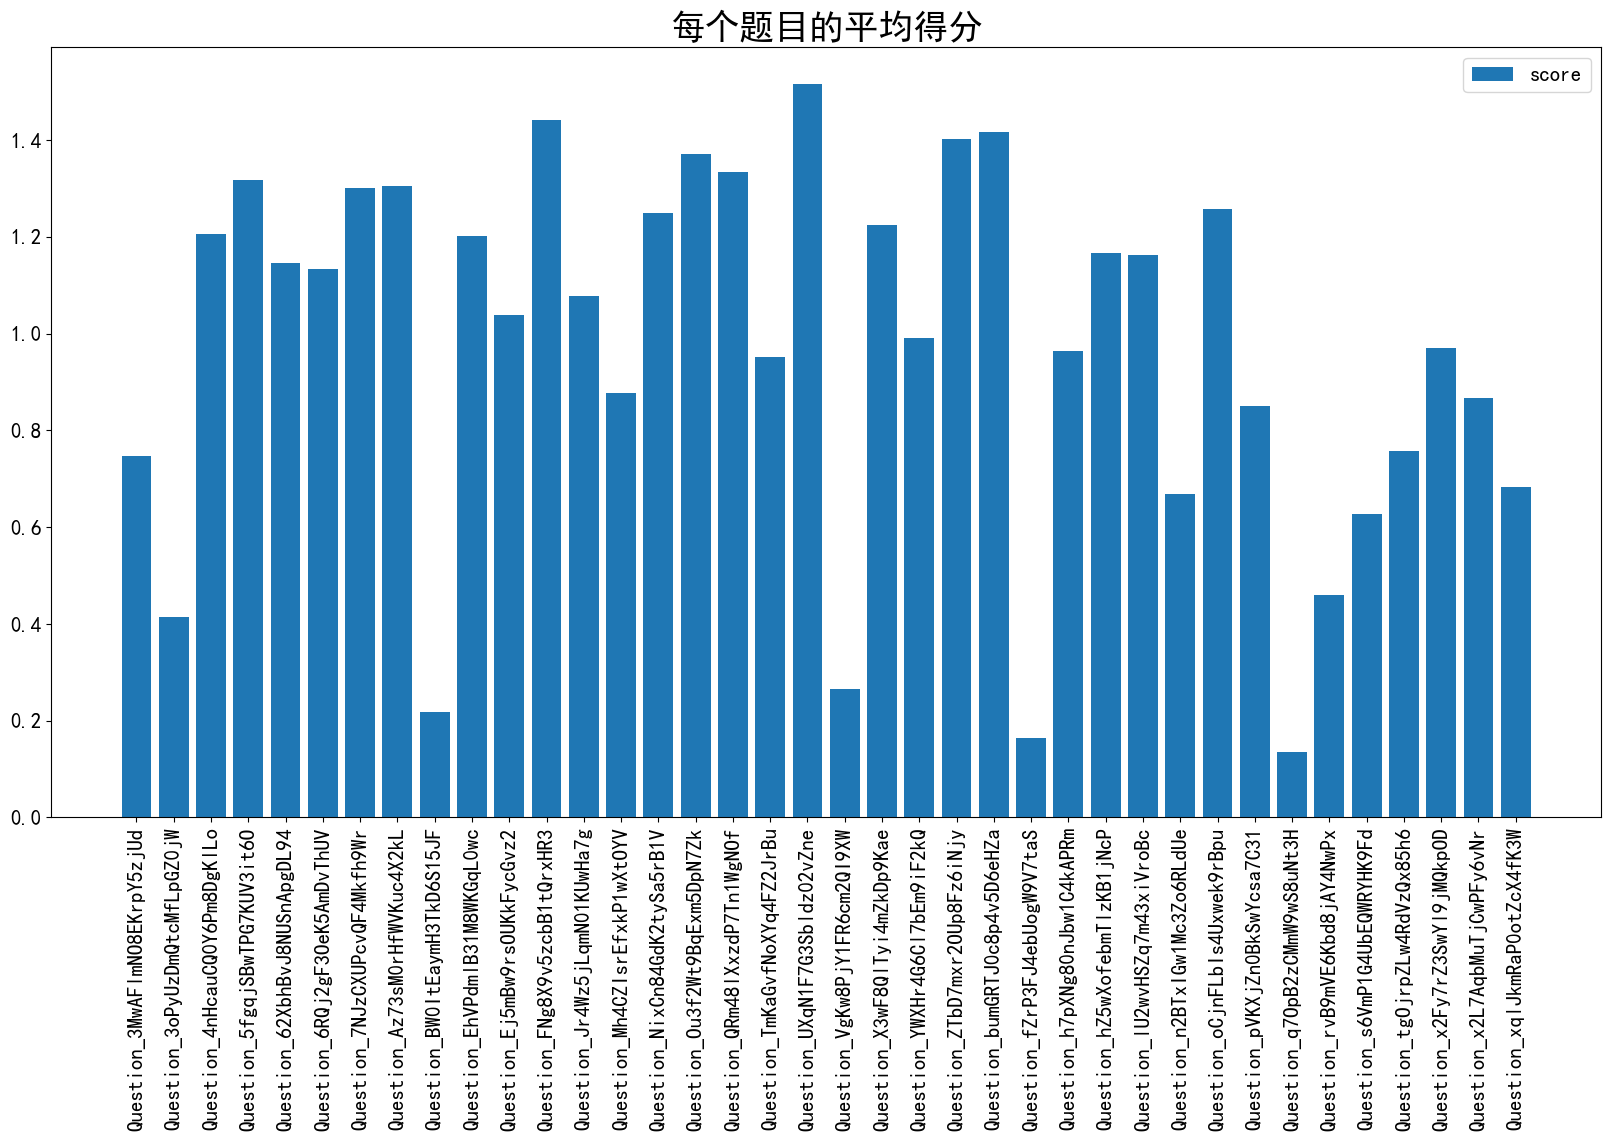

In [32]:
# 以下为数据可视化
fig=plt.figure(figsize=(20,10))
plt.bar(df11['title_ID'],df11['score_x'],label='score')
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.title('每个题目的平均得分',fontsize=25)
plt.savefig('每个题目的平均得分.jpg',dpi=660,bbox_inches='tight')  #  保存图片
plt.show()

In [33]:
# 查看每个题目的得分率
df12 = pd.merge(df1,df11,on='title_ID')
df12['rate'] = df12['score_x']/df12['score']
df13 = df12.sort_values(by='rate')
df13.head()

,index,title_ID,score,knowledge,sub_knowledge,score_x,rate
1,2,Question_q7OpB2zCMmW9wS8uNt3H,1,r8S3g,r8S3g_n0m9rsw4,0.136016,0.136016
2,4,Question_fZrP3FJ4ebUogW9V7taS,1,r8S3g,r8S3g_n0m9rsw4,0.163727,0.163727
5,7,Question_3oPyUzDmQtcMfLpGZ0jW,2,t5V9e,t5V9e_e1k6cixp,0.414337,0.207169
3,5,Question_BW0ItEaymH3TkD6S15JF,1,r8S3g,r8S3g_n0m9rsw4,0.216854,0.216854
15,17,Question_n2BTxIGw1Mc3Zo6RLdUe,3,m3D1v,m3D1v_r1d7fr3l,0.669321,0.223107


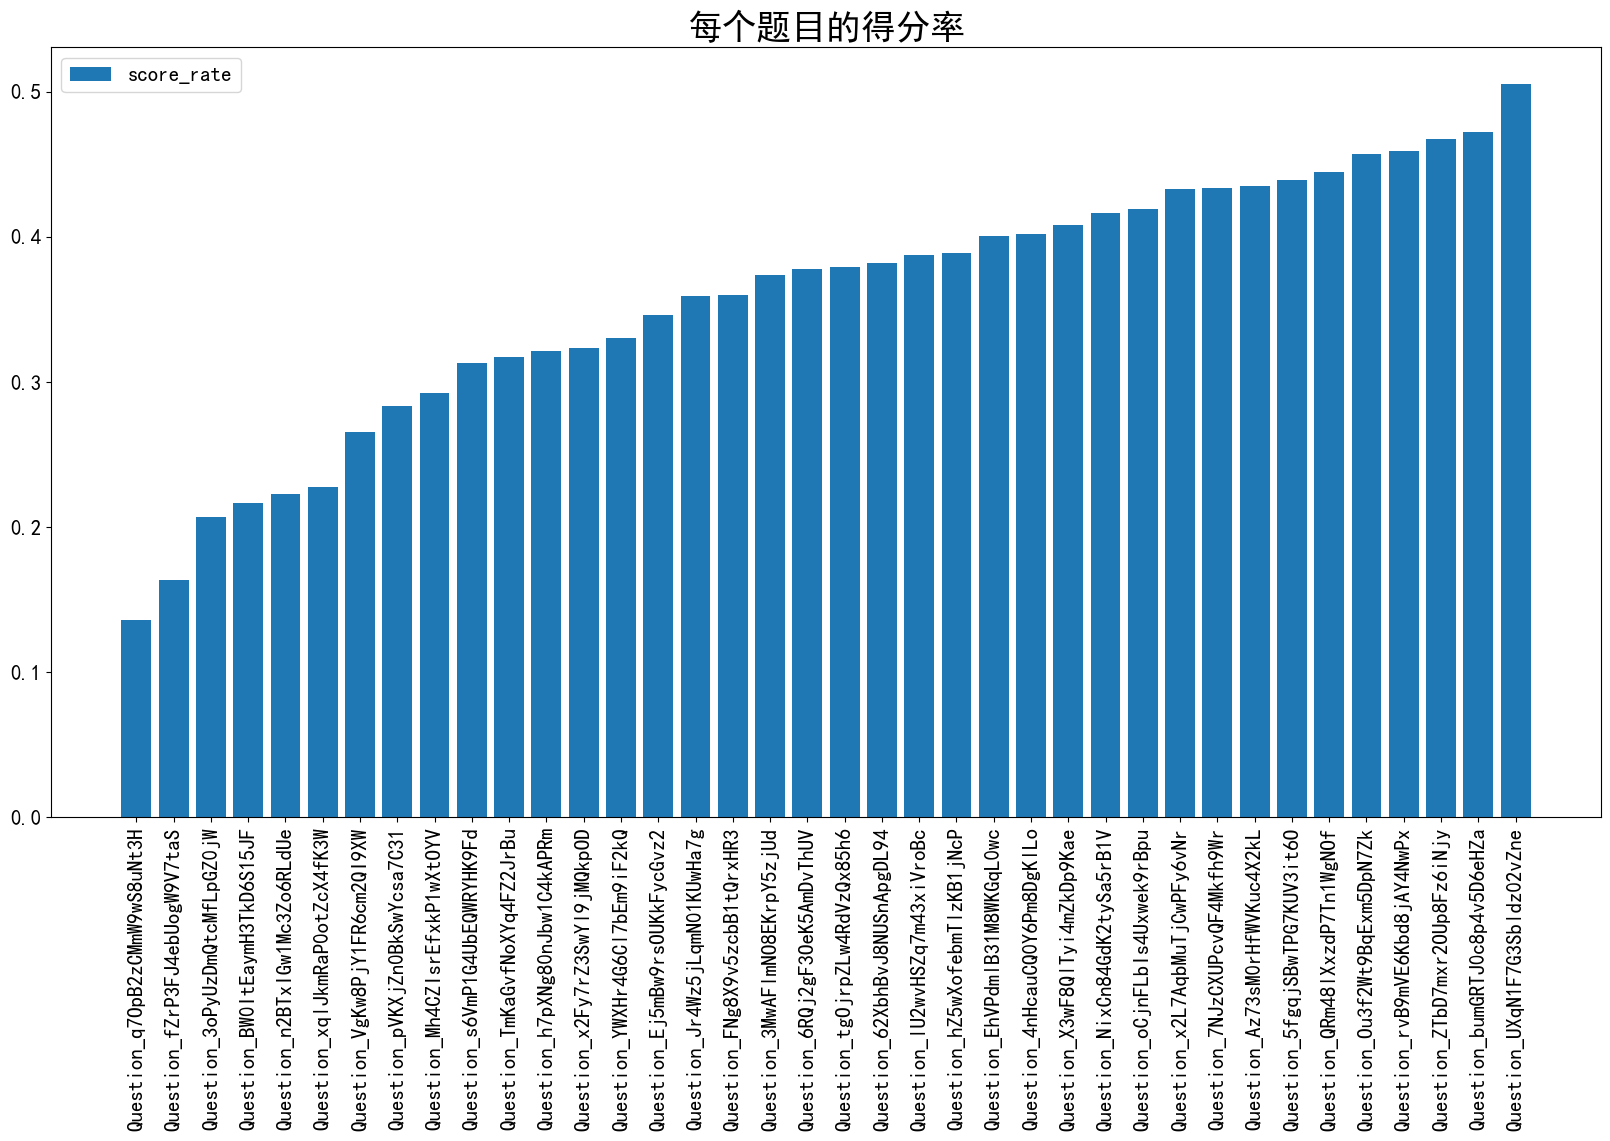

In [34]:
# 以下为数据可视化
fig=plt.figure(figsize=(20,10))
plt.bar(df13['title_ID'],df13['rate'],label='score_rate')
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.title('每个题目的得分率',fontsize=25)
plt.savefig('每个题目的得分率.jpg',dpi=660,bbox_inches='tight')  #  保存图片
plt.show()
# 得分率低于30%的题目，题目难度超出了其能力范围，这些是不合理的题目